# Introduction

Data analyst and data scientists often have to perform statistical calculations, including calculations of probabilities, probability distributions, and confidence intervals. In this lesson, we will learn about Scientific Library for Python (`SciPy`), which is the scientific toolbox for Python.

Using a real-world dataset, we will learn to perform statistical computations and hypothesis testing with `SciPy`. By the end of the lesson, we will be able to state conclusions that go beyond our sample data.

The dataset we will be using contains information about particular students from two public schools in Portugal. The data was collected in order to study alcohol consumption in young people and the effects it has on their academic performance. The dataset was built from two sources from school reports and from questionnaires that the students answered.

In [1]:
%autosave 5

Autosaving every 5 seconds


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import data
data = pd.read_csv('student.csv')

# Show first five rows
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


This dataset has more than 30 variables. The file Dataset Variables.md has an explanation of each, if you are interested. In this lesson, we will only be looking at the following:

- `G3`: This variable stores the final grade for the course subject. This is numeric, ranging from 0 to 20.
- `sex`: This variable stores the sex of the student. This is categorical, F (female) or M (male).
- `alc`: We will create this variable from the the columns Dalc and Walc, which store the value of alcohol consumption levels on weekdays and weeknights respectively. Both columns are numeric, ranging from 1 (very low) to 5 (very high).

To create `alc`, let’s create and apply a function to get a weighted average of `Dalc` and `Walc`. Then, let’s map those with a weighted average of greater than 2 as High alcohol consumption, and the rest as Low.

In [3]:
# Create function to calculate weight average of alcohol consumption
def weighted_alc(Dalc, Walc):
    return (5 * Dalc + 2 * Walc) / 7

# Create variable `alc`
data['alc'] = weighted_alc(data['Dalc'], data['Walc']) <= 2
data['alc'] = data['alc'].map({True: 'Low', False: 'High'})

# Show first five rows
data['alc'].head()

0     Low
1     Low
2    High
3     Low
4     Low
Name: alc, dtype: object

Great! Now that we have our data, let’s start performing some statistical computations on it!


## I. Confidence intervals

`SciPy` is a tool for doing scientific computing in Python. It is a Python-based library that is an open source software for math, science, and engineering. It contains various toolboxes dedicated to common issues in scientific computing. For example, `scipy.io` deals with file `input/output`, `scipy.linalg` deals with linear algebra operations, and `scipy.ndimage` deals with image processing.

We will be working with `scipy.stats`, a subpackage that contains a large number of probability distributions, as well as a growing library of statistical functions. This is a great tool to use for data analysis or data science with Python because statistics is the core of data science.

This module is typically imported as `stats`:

In [4]:
# Import scipy.stats
import scipy.stats as stats

Our dataset contains information about a **sample** of the whole **population**. When we perform calculations, for example calculating the mean of a certain variable, this is actually the “sample mean”. Since we don’t have data for the entire population, we need to infer from the sample data to find out the “population mean”.

A **confidence interval (CI)** is a range of values which is likely to include the true value of an unknown population parameter.

### Confidence interval for a mean

Say we want to calculate a 95% confidence interval for the mean final grade for all students. In other words, this means we want to find a range of grades for which we are 95% certain that the actual population mean falls in.

Statistical theory tells us that we can calculate CIs for the mean of a variable using the normal distribution. There are three components:

- Sample mean of the variable that we are interested in
- Standard error of the mean (SEM) – sample standard deviation divided by the square root of the sample size.
- Confidence level – this can be any level, common ones being 95% and 99%. We have picked 95%.

Since we already know how to calculate sample mean, let’s do that first:

In [5]:
# Find sample mean of final grade
sample_mean_grade = data['G3'].mean()
sample_mean_grade

11.906009244992296

We also know how to find the sample size:

In [6]:
# Find sample size
sample_size = data.shape[0]
sample_size

649

Now, we can calculate `SEM` by finding the standard deviation for the sample using `std()` and dividing that by `sqrt(sample_size)`:

In [7]:
# Find standard error of the mean of final grade
std_error_grade = data['G3'].std() / np.sqrt(sample_size)
std_error_grade

0.12681435030794902

To calculate the confidence interval, we will use the norm object from the `statssubpackage`. The norm object has an `interval()` method that receives three inputs – our chosen confidence interval 0.95, and the sample mean and SEM that we’ve just calculated!

In [8]:
# Calculate the 95% CI for mean final grade
stats.norm.interval(0.95, loc=sample_mean_grade, scale=std_error_grade)

(11.65745768566587, 12.154560804318722)

This returns a 95% confidence interval for the mean of the final grades – we can be 95% certain that the population mean final grade is between 11.66 and 12.15.

### Confidence interval for a proportion

Now that we know how to calculate a confidence interval for a mean… let's learn how to calculate a confidence interval for a proportion.

We will look at alcohol consumption level alc and find a 99% confidence interval for the proportion of total students with a high alcohol consumption level. The calculation is very similar. We need the following three values:

- Sample proportion
- Sample standard error
- Confidence level

The standard error for a proportion is given by the following formula:

$$SE = \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$

  where, $\hat{p}$ is the sample proportion.

Now, let's look at the sample proportion of students with a high alcohol consumption:

In [9]:
# Find sample proportion of students with high alcohol consumption
sample_prop = data['alc'].value_counts(normalize=True)['High']
sample_prop

0.25577812018489987

Using the given formulas and the example from above, see if you can finish the calculation.

Calculate a 99% confidence interval for students with high alcohol consumption the using `stats.norm.interval()` method. You will need to calculate the `std_error_prop`
first.

In [10]:
# TASK --- Calculate the 99% CI for proportion of students with high alcohol consumption

std_error_prop = np.sqrt((sample_prop)*(1 - sample_prop)/sample_size)
std_error_prop

stats.norm.interval(0.99, loc=sample_prop, scale=std_error_prop)


(0.21166399779324124, 0.2998922425765585)

## II. Probability calculations

There are dozens of probability distributions available in the stats package, and we can use them for doing simulations, to calculate the random variables, and to do probability calculations. Let's take a look at an example and answer a few questions.

In the previous step you should have found a 99% confidence interval of (0.21, 0.30) for the proportion of students in the population with high alcohol consumption. Let’s assume that the true value is 0.25.

### Binomial Distribution

A binomial distribution is one where there are two possible outcomes with fixed probabilities summing to 1 (for example, a coin toss). The two outcomes are known as “success” (e.g. heads) and “failure” (e.g. tails). It is characterized by a probability mass function (pmf) which gives the probability that a variable is exactly equal to a value.

Let’s look at an example. Assuming the proportion of students in the population with high alcohol consumption is 0.25, if we have a class of 10 students what is the probability of finding five students with high alcohol consumption?

A binomial distribution is denoted as X ~ b(n, p) where n is the number of trials, and p is the probability of success. The pmf gives the probability of getting exactly k successes in n trials:

$$f(k, n, p) = \binom{n}{k}p^{k}(1-p)^{n-k} $$



Luckily, the `stats` package has a built-in `binom` object which has a pmf method so we do not need to calculate this by hand. We just need to provide the parameters that `pmf` needs for the binomial distribution. In our case, k is 5 students, n is 10 students, and p is 0.25

In [12]:
# Binomial distribution pmf for k=5
stats.binom.pmf(k=5, n=10, p=0.25)

0.058399200439453194

In plain English, this is interpreted as: “In a class of 10 people, the probability of us finding 5 students with high alcohol consumption is 5.8%”.

We can calculate the pmf for each possible k easily:

In [13]:
# Binomial distribution pmf for all k
all_pmf = stats.binom.pmf(k=np.arange(11), n=10, p=0.25)
all_pmf

array([5.63135147e-02, 1.87711716e-01, 2.81567574e-01, 2.50282288e-01,
       1.45998001e-01, 5.83992004e-02, 1.62220001e-02, 3.08990479e-03,
       3.86238098e-04, 2.86102295e-05, 9.53674316e-07])

Let’s visualize these pmfs next to the **cumulative distribution function** (the probability of getting less than or equal to k successes in n trials):

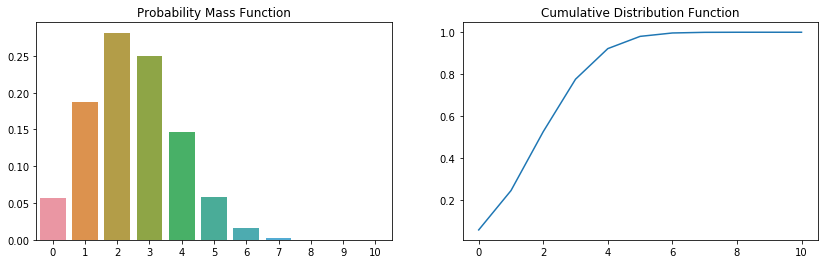

In [14]:
# Calculate cumulative distribution function
cdf = stats.binom.cdf(k=np.arange(11), n=10, p=0.25)

# Plot binomial dist pmf and cdf
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
sns.barplot(x=np.arange(11), y=all_pmf, ax=ax[0]
           ).set_title('Probability Mass Function')
sns.lineplot(x=np.arange(11), y=cdf, ax=ax[1]
            ).set_title('Cumulative Distribution Function')
plt.show()

From this figure we can see that with a population proportion of 0.25 students with high alcohol consumption, in a class of 10 students it is most likely that we will find 2 students with high alcohol consumption.

If we have a class of 20 students, calculate the probability of finding 4 or less students with high alcohol consumption.

In [15]:
# TASK --- Calculate probability of 4 or less students with high alcohol consumption in class of 20

# Binomial distribution pmf for k=4
stats.binom.pmf(k=4, n=20, p=0.25)

cdf_2 = stats.binom.cdf(k=4, n=20, p=0.25)
cdf_2

0.41484150253018026

## III. Hypothesis testing

As we stated in the introduction, the data from our sample was collected to study alcohol consumption in young people and the effects it has on their academic performance. Let’s see if we can answer this question for ourselves!

### Hypothesis testing framewok

When we conduct a hypothesis test, there are typically five steps:

1. Set up two competing hypotheses; one is called the **null hypothesis** and the other is called the **alternative hypothesis**. What determines these hypotheses is the type of question that we would like to answer.
2. Set a **significance level, α**. The most common α value chosen by researchers or data analysts is 5% or 0.05, but other popular choices are 0.01 or 0.1.
3. Calculate the **test statistic** and the **p-value**, and then compare this p-value with α.
4. Based on this comparison, decide whether we want to reject or accept the null hypothesis.
5. State an overall conclusion on what these results imply for the original question.

`SciPy` offers many statistical functions that we can use to perform statistical tests, such as `normaltest` and `pearsonr`. A full list can be found here.

We will discuss a few of these to answer the following questions:

- Are the population variances in grades the same in students with low alcohol consumption and students with high alcohol consumption?
- Does alcohol consumption affect academic performance?
- Do male students drink more than female students?

### Variance in grades in students with low vs. high alcohol consumption

We have two groups – students with ‘Low’ alcohol consumption and students with ‘High’ alcohol consumption, stored in variable `alc`. The question is whether the variance in grades for both groups is the same.

Since this is a question about variances, we will use **Bartlett's Test**. The null hypothesis for this test states that the variances in the population are equal. We will choose a significance level of α = 0.05 – i.e. we will reject the null hypothesis if the p-value for our test is less than 0.05.

Let’s first split the data into our two groups and store grades in two vectors, `grades_low_alc` and `grades_high_alc`:

In [16]:
# Split grade data into two groups based on alcohol consumption level
grades_low_alc = data[data['alc'] == 'Low']['G3']
grades_high_alc = data[data['alc'] == 'High']['G3']

`stats`  makes performing Bartlett’s Test very simple. To get the test-statistic and p-value, all we need to do is pass the two vectors into `stats.bartlett()`:

In [17]:
# Perform Bartlett's Test
stats.bartlett(grades_low_alc, grades_high_alc)

BartlettResult(statistic=1.102508591338272, pvalue=0.293716231811652)

We are especially interested in pvalue. It is greater than our significance level, so according to this test, we cannot reject the null hypothesis of equal variances. In other words, we can assume that the two sample groups come from populations with the same variance in grades.

### Effect of alcohol consumption on academic performance

Before we start any statistical testing, we need to set up our two hypotheses. Let’s create a plot to visually compare the academic performance of the two groups of students.

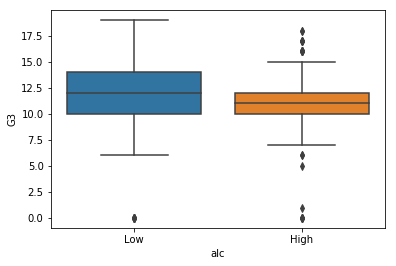

In [18]:
# Plot academic performance by group
sns.boxplot(x='alc', y='G3', data=data)
plt.show()

We can see that, from our sample data, the group with a low consumption of alcohol has higher grades on average than the group with high alcohol consumption.

Generally, a null hypothesis is one we are trying to reject or nullify. So, we can set our null hypothesis to be that the population mean of the final grades are equal. We believe this to be untrue and want to reject it with our alternative hypothesis that the population mean of the final grades are different.

We will perform a **t-test** to test our hypothesis. Again, we will use the significance value of 0.05 – i.e. we reject the null if the p-value is less than 0.05.

In order to perform this `t-test`, we can use the `ttest_ind` function from the stats package. We pass the two vectors containing the grades for each group, and assert that we have equal variances (we showed this in the previous question).

In [19]:
# Perform t-test
stats.ttest_ind(grades_low_alc, grades_high_alc, equal_var=True)

Ttest_indResult(statistic=4.621320706949354, pvalue=4.603608830369269e-06)

Again, we get back the test statistic and the p-value. Since the pvalue is extremely low, we can reject the null hypothesis with strong evidence. We conclude that there is a statistically significant difference between the grades of students with low alcohol consumption and students with high alcohol consumption.

### Alcohol consumption by males vs. females

Do male students drink more than female students? Again, we will explore our data first by plotting the value counts for variables sex and `alc`:

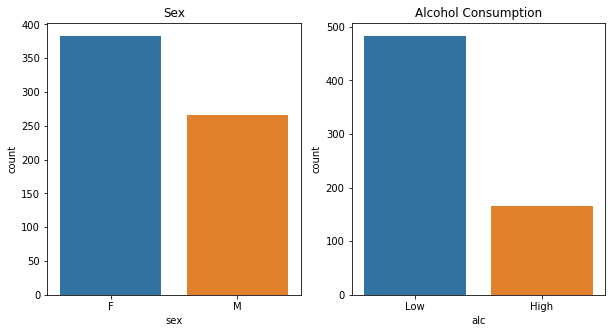

In [20]:
# Plot `sex` and `acl`
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(data['sex'], ax=ax[0]).set_title('Sex')
sns.countplot(data['alc'], ax=ax[1]).set_title('Alcohol Consumption')
plt.show()

We see that there are more females than males, and more students with low alcohol consumption levels than high. We can also create a conditional plot – let’s create a countplot for `alc` level, conditioning on `sex`:

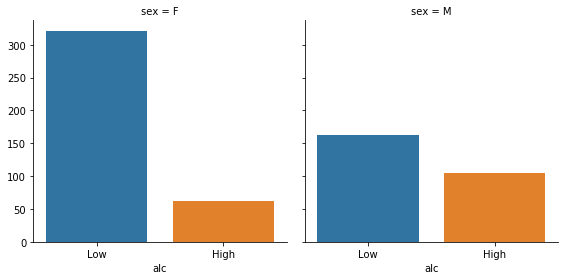

In [21]:
# Plot `acl`, conditioning on `sex`
cond_plot = sns.FacetGrid(data, col='sex', hue='alc', height=4, aspect=1)
cond_plot.map(sns.countplot, 'alc', order=['Low', 'High'])
plt.show()

This shows that for both sexes, there are more students with low alcohol consumption than high. We can get exact values using `pd.crosstab`:

In [22]:
# Create contingency table
sex_alc_table = pd.crosstab(data['alc'], data['sex'])
sex_alc_table

sex,F,M
alc,,
High,62,104
Low,321,162


This is called a **contingency table** or a **cross-tabulation** table. We now have four possible categories:

1. Female with high level of alcohol consumption (62 students)
2. Female with low level of alcohol consumption (321 students)
3. Male with high level of alcohol consumption (104 students)
4. Male with low level of alcohol consumption (162 students)

We can calculate the proportions for each group simply by dividing the number of students with high alcohol consumption by the total number of students:

In [23]:
# Calculate proportions of high alcohol consumers for each group
m_high_prop = sex_alc_table['M']['High'] / sex_alc_table['M'].sum()
f_high_prop = sex_alc_table['F']['High'] / sex_alc_table['F'].sum()

print(f'Proportion of males with high alc: {m_high_prop}')
print(f'Proportion of females with high alc: {f_high_prop}')

Proportion of males with high alc: 0.39097744360902253
Proportion of females with high alc: 0.1618798955613577


For our sample, we see that males definitely drink more than females. Can we say that this holds up for the population? Let’s answer this using a `chi-squared` test.

Before we begin, we need to outline our hypotheses and significance level:

- Null hypothesis: males and females have the same level of alcohol consumption
- Alternative hypothesis: males and females do not have the same level of alcohol consumption
- Significance level: 0.05

The function `stats.chi2_contingency` takes a contingency table and returns a test statistic, the `p-value`, the degrees of freedom, and the expected frequencies for each category.

In [24]:
# Perform chi-squared test
chi_stat, p_value, dof, expected_freq = stats.chi2_contingency(sex_alc_table)

print(f'Test statistic: {chi_stat}')
print(f'p-value: {p_value}')
print(f'Degs of freedom: {dof}')
print(f'Expected frequencies: {expected_freq}')

Test statistic: 42.08718662606401
p-value: 8.72933011769437e-11
Degs of freedom: 1
Expected frequencies: [[ 97.96302003  68.03697997]
 [285.03697997 197.96302003]]


Let’s store our expected frequencies as a DataFrame to make it easier to understand.

In [25]:
# Store expected frequencies in pandas DataFrame
expected_freq_table = pd.DataFrame(expected_freq,
                                   index=['High', 'Low'],
                                   columns=['F', 'M'])
expected_freq_table

,F,M
High,97.96302,68.03698
Low,285.03698,197.96302


So under the null hypothesis, the expected number of females with high alcohol consumption is 97.96, the expected number of males with high alcohol consumption is 68.04, and so on.

Our p-value is 8.73e-11 – much smaller than our significance level. This means there is very good evidence in favor of the alternative hypothesis. We can conclude that male students drink more than female students.

## IV. Activity: Putting it all together

### Alcohol consumption by school

Now, it's your turn! In this activity you will be performing a hypothesis test on your own, using a chi-test. You will be answering the following question: **Do alcohol consumption levels differ by school**?

In other words, is there a significant difference in the proportion of students with high alcohol consumption levels between the two schools, Gabriel Pereira `GP` and Mousinho da Silveira `MS`.

Our null hypothesis $H_{0}$ is that there is no difference in alcohol consumption level between the two schools. Therefore our alternative hypothesis $H_{1}$ is that there is a significant difference. We will choose a significance level of $α = 0.05$.

Let's begin!

The first step is to explore our data. We have created `fig` and  `ax` for you. Plot the value counts for variables school and alc using the `seaborn` library.

Make sure you name your plots "School" and "Alcohol Consumption".

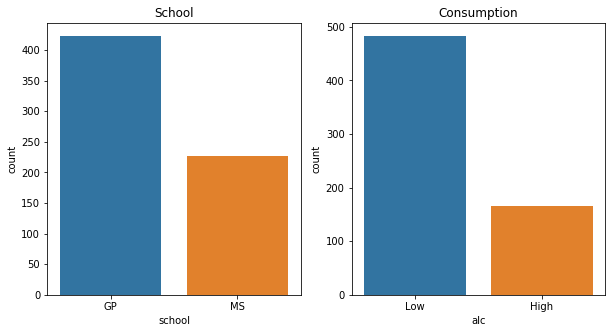

In [26]:
# TASK --- Plot `school` and `alc`
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(data['school'], ax=ax[0]).set_title('School')
sns.countplot(data['alc'],ax=ax[1]).set_title('Consumption')
plt.show()

We can see that our sample contains more students from Gabriel Pereira than students from Mousinho da Silveira. This is important – we don't want to assume there are more high-level alcohol consumers in GP if it is purely because there are more students from GP in our sample.

The next step is to check the proportion of low and high alcohol consumption in students for each school. Plot `alc` conditioning on school. The plots should be colored depending on alcohol consumption level, and should be ordered from Low to High.

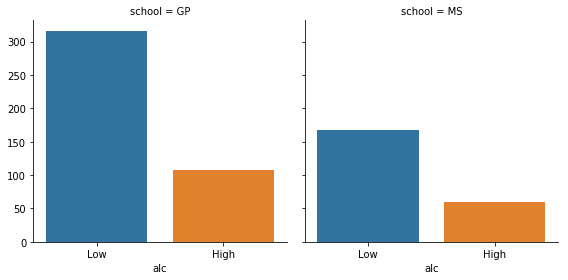

In [27]:
# TASK --- Plot `alc`, conditioning on `school`
cond_plot_als = sns.FacetGrid(data, col='school', hue='alc', height=4, aspect=1)
cond_plot_als.map(sns.countplot, 'alc', order=['Low', 'High'])
plt.show()

From this plot we can see visually that in both schools, there are fewer high-level alcohol consumers than low-level. We can now move on to figuring out the exact proportions

Using `pandas`, create a contingency table called `school_alc_table`. This table should show the number of students from each school with low and high levels of alcohol consumption.

In [28]:
# TASK --- Create contingency table
school_alc_table = pd.crosstab(data['alc'], data['school'])
school_alc_table

school,GP,MS
alc,,
High,107,59
Low,316,167


Now, using your contingency table school_alc_table, calculate the proportions of high-level alcohol consumers for each school. Call these proportions gp_high_prop and ms_high_prop.

In [29]:
# TASK --- Calculate proportions of high alcohol consumers for each group
gp_high_prop = school_alc_table['GP']['High'] / school_alc_table['GP'].sum()
ms_high_prop = school_alc_table['MS']['High'] / school_alc_table['MS'].sum()

print(f'Proportion of students in GP school with high alc: {gp_high_prop}')
print(f'Proportion of students in MS school with high alc: {ms_high_prop}')

Proportion of students in GP school with high alc: 0.25295508274231676
Proportion of students in MS school with high alc: 0.2610619469026549


Looks like there is a slightly higher proportion of MS students that have high alcohol consumption levels in our sample...let's find out if this is statistically significant in the entire population!

Using a chi-test, find out whether there is a significant difference in the number of students with high alcohol consumption levels between the two schools.

Print the `chi_stat`, `p_value`, `dof`, and `expected_freq`.

In [30]:
# TASK --- Perform chi-squared test
chi_stat, p_value, dof, expected_freq = stats.chi2_contingency(school_alc_table)

print(f'Test statistic: {chi_stat}')
print(f'p-value: {p_value}')
print(f'Degs of freedom: {dof}')
print(f'Expected frequencies: {expected_freq}')

Test statistic: 0.017184237332077596
p-value: 0.8957051700948762
Degs of freedom: 1
Expected frequencies: [[108.19414484  57.80585516]
 [314.80585516 168.19414484]]


Store your `expected_freq` as a `pandas` DataFrame called expected_freq_table. The index should be students' alcohol consumption level, and the columns should be the students' school.

In [31]:
# TASK --- Store expected frequencies in pandas DataFrame
expected_freq_table = pd.DataFrame(expected_freq,
                                   index=['High', 'Low'],
                                   columns=['GP', 'MS'])
expected_freq_table

,GP,MS
High,108.194145,57.805855
Low,314.805855,168.194145
